## Part A - Python Exploratory Data Analysis & Trends

- ### Let't import all the necessary libraries for the analysis

In [995]:
import pandas as pd 
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [996]:
#Reading the csv file using pandas library
df = pd.read_csv("../data/hour.csv")

In [997]:
#Quick overview of the dataframe
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Next step: let's check for missing and duplicate values 

<Axes: >

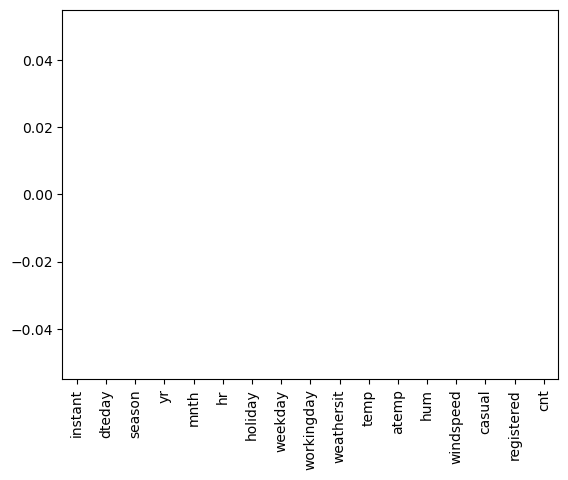

In [999]:
# Check for missing values 
df.isna().sum().plot(kind='bar')

In [1000]:
df.duplicated().sum()

np.int64(0)

- ### Perfect, no missing and duplicated values found in the dataset, we are sure that we will not double-count a metric during the analysis. 

### Let's do some feature engenerring to reorganise and to better understand the data.
- This will help in making more scense of the data when creating and presenting visuals.

In [1001]:
day_mapping = { 
    0: 'Sunday', 
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}
#create a new column day name
df['day_name'] = df['weekday'].map(day_mapping)

In [1002]:
season_maping = {
    1: 'springer',
    2: 'summer',
    3: "fall",
    4: "winter"
}
#create a new column season
df['season_name'] = df['season'].map(season_maping)

In [1003]:
year_mapping = {
    0: "2011",
    1: "2012"
}
#create a new column year
df['year'] = df['yr'].map(year_mapping)

In [1004]:
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
#create a new column Month names
df['month'] = df['mnth'].map(month_mapping)

In [1005]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day_name,season_name,year,month
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Saturday,springer,2011,January
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Saturday,springer,2011,January
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Saturday,springer,2011,January
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Saturday,springer,2011,January
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Saturday,springer,2011,January


In [1006]:
df.shape

(17379, 21)

#### The dataframe has a total of 17379 rows and 17 columns orginaly but we created 4 news features, so the total number of columns is now 21.

#### Before moving on let's change the `dteday` type to datetime

In [1007]:
# conversion of the date column to datatime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [1008]:
# summary stats for all the numeric columns
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Summaries & groupbys 


- Let's reorder the days of the week and the months of each year using `pd.Categorical`

In [1009]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)

In [1010]:

month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

In [1011]:
groupby_year = df.groupby('year')['cnt'].sum()

In [1012]:
groupby_year
# 2012 has more rides than 2011, with a total of 204976 rides compare to 1243103 rides in 2021. 

year
2011    1243103
2012    2049576
Name: cnt, dtype: int64

In [1013]:
casual_vs_registered_riders_by_year = df.groupby('year')[['casual','registered']].sum()

In [1014]:
casual_vs_registered_riders_by_year

,casual,registered
year,,
2011,247252,995851
2012,372765,1676811


Percent Growth = (Current Year − Previous Year / Previous Year) * 100

In 2012 the registerd riders grew by about 68.4% compared to 2011,
and for casual riders about 50.76%.

<Axes: xlabel='year'>

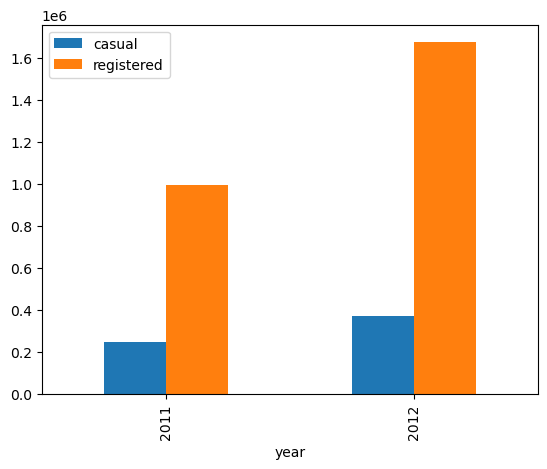

In [1015]:
casual_vs_registered_riders_by_year.plot(kind='bar')

In [1016]:
# Rides by Hours
groupby_hour = df.groupby('hr')['cnt'].agg(['count','mean','median','std']).reset_index().sort_values('hr')

In [1017]:
groupby_hour

,hr,count,mean,median,std
0,0,726,53.898072,40.0,42.307910
1,1,724,33.375691,20.0,33.538727
2,2,715,22.869930,11.0,26.578642
3,3,697,11.727403,6.0,13.239190
4,4,697,6.352941,6.0,4.143818
5,5,717,19.889819,19.0,13.200765
6,6,725,76.044138,76.0,55.084348
7,7,727,212.064649,208.0,161.441936
8,8,727,359.011004,385.0,235.189285
9,9,727,219.309491,216.0,93.703458


Text(0, 0.5, 'Numbers of rides')

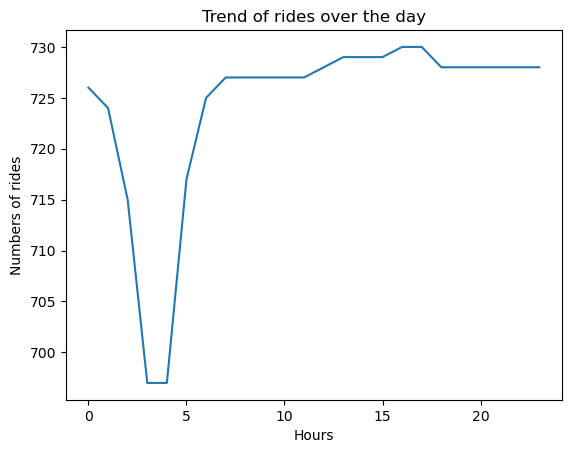

In [1018]:
groupby_hour['count'].plot(kind='line')
plt.title("Trend of rides over the day")
plt.xlabel("Hours")
plt.ylabel("Numbers of rides")


The lowest rides in a day happens between mid-night and 3-4am which have the lowest (697 rides), therefore the higher rides troughout the day is between 7am-5pm with a peek of 730 rides which can be explained by people renting bikes during that period to go or come back to work, also to exercise or to just have fun during a sunny day.

In [1019]:
df.groupby('holiday')['cnt'].sum()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

Bikes more rides during regural and not holiday.

In [1020]:
# Rides by weathersit
groupby_weathersit = df.groupby('weathersit')['cnt'].agg(['count','mean','median','std']).reset_index().sort_values('weathersit')


In [1021]:
groupby_weathersit

,weathersit,count,mean,median,std
0,1,11413,204.869272,159.0,189.487773
1,2,4544,175.165493,133.0,165.431589
2,3,1419,111.579281,63.0,133.781045
3,4,3,74.333333,36.0,77.925178


Bikes are most rides when the weather is beautiful around 11413 rides during moment the weather were: Clear, Few clouds, Partly cloudy or Partly cloudy, because people feels most secure to rides bikes during that period. so, during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog people ride bikes the least

<Axes: >

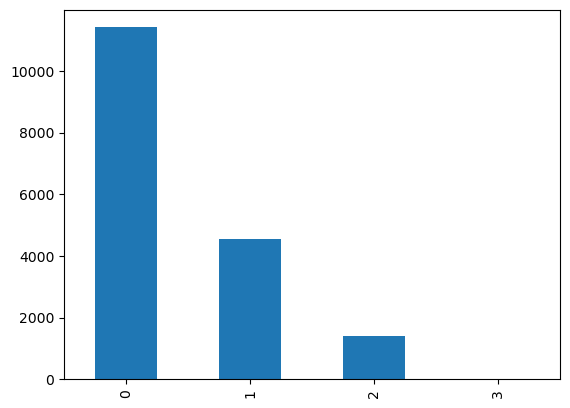

In [1022]:
groupby_weathersit['count'].plot(kind='bar')

In [1023]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day_name,season_name,year,month
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Saturday,springer,2011,January
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Saturday,springer,2011,January
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Saturday,springer,2011,January
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Saturday,springer,2011,January
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Saturday,springer,2011,January


In [1024]:
# Rides by weekdays
groupby_weekday = df.groupby('day_name')['cnt'].agg(['count','mean','median','std']).reset_index().sort_values('day_name')


/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_11122/2836798571.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_weekday = df.groupby('day_name')['cnt'].agg(['count','mean','median','std']).reset_index().sort_values('day_name')


In [1025]:
groupby_weekday

,day_name,count,mean,median,std
0,Monday,2479,183.744655,139.0,179.514167
1,Tuesday,2453,191.238891,147.0,187.820480
2,Wednesday,2475,191.130505,143.0,190.894464
3,Thursday,2471,196.436665,154.0,188.011923
4,Friday,2487,196.135907,165.0,174.076894
5,Saturday,2512,190.209793,129.0,179.820569
6,Sunday,2502,177.468825,116.0,168.167710


Saturdays and sundays have the most rides 

In [1026]:
# Rides by Season 
groupby_season = df.groupby('season_name')['cnt'].agg(['sum','count','mean','median','std']).reset_index().sort_values('season_name')
# Rides by working
groupby_working = df.groupby('workingday')['cnt'].agg(['count','mean','median','std']).reset_index().sort_index()


In [1027]:
groupby_working

,workingday,count,mean,median,std
0,0,5514,181.405332,119.0,172.853832
1,1,11865,193.207754,151.0,185.107477


The bikes are rides the most in fall and working day.

Now let's create a pivot-table to see the average rides for each hours

In [1028]:
pivot = df.pivot_table(index='hr', columns='day_name', values='cnt', aggfunc='mean')

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_11122/2091091442.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='hr', columns='day_name', values='cnt', aggfunc='mean')


In [1029]:
pivot

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hr,,,,,,,
0,34.009524,27.623762,34.557692,39.271845,52.432692,94.304762,93.990385
1,17.307692,12.540000,15.336538,17.223301,24.721154,67.780952,77.432692
2,10.313131,6.801980,7.813725,9.156863,12.740385,50.495238,61.627451
3,5.113402,4.152174,4.888889,5.071429,6.598039,22.885714,31.144231
4,5.785714,5.131313,4.968750,5.280000,6.072165,7.657143,9.362745
5,21.653846,24.455446,25.750000,25.912621,23.903846,8.291262,8.693878
6,85.865385,106.500000,107.807692,107.436893,90.028846,21.000000,14.495146
7,248.538462,299.696078,303.980769,304.737864,254.326923,45.961905,33.104762
8,412.192308,471.784314,488.326923,488.572816,462.278846,114.476190,83.857143


It seem like there are more traffic around 5pm for each day of the week.

## Visual 1: Average rides by hour (line-plot)


In [1030]:
plt.figure(figsize=(10,7))
plt.plot(groupby_hour['hr'].astype(int), groupby_hour['mean'], marker='o',color='#4ECDC4')
plt.xticks(range(0,24)) # chose a range from 0 to 24 because we have 24h in a single day
plt.xlabel("Hour of day", fontsize=12)
plt.ylabel("Average hourly rides", fontsize=12)
plt.title("Average Hourly Bike-Share Rides by Hour", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.savefig(os.path.join("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod4_Project-Riding-the-Demand-Insights-for-a-Bike-Share-PM/figures/avg_rides_by_hour.png"))
plt.close()



## Visual 2: Average rides by weekday (bar-plot)


In [1031]:
groupby_weekday

,day_name,count,mean,median,std
0,Monday,2479,183.744655,139.0,179.514167
1,Tuesday,2453,191.238891,147.0,187.820480
2,Wednesday,2475,191.130505,143.0,190.894464
3,Thursday,2471,196.436665,154.0,188.011923
4,Friday,2487,196.135907,165.0,174.076894
5,Saturday,2512,190.209793,129.0,179.820569
6,Sunday,2502,177.468825,116.0,168.167710


In [1032]:


plt.figure(figsize=(10,7))
ax = plt.subplot()
fig = ax.bar(groupby_weekday['day_name'], groupby_weekday['mean'], 
        color=['#FF6B6B' if weekday=='Sunday' or weekday =="Saturday" else '#4ECDC4' for weekday in groupby_weekday['day_name']])
#plt.xticks(range(0,7))
plt.xlabel("Weekday",fontsize=12)
plt.ylabel("Average hourly rides", fontsize=12)
plt.title("Average Bike-Share Rides by Weekday", fontsize=14, fontweight='bold')

# Add annotations to the bars
for bar in fig:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), 
            va='bottom', ha='center')
    
# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#4ECDC4', label='Weekday'),
                   Patch(facecolor='#FF6B6B', label='Weekend')]
ax.legend(handles=legend_elements, loc='upper right')
plt.savefig(os.path.join("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod4_Project-Riding-the-Demand-Insights-for-a-Bike-Share-PM/figures/avg_rides_by_weekday.png"))
plt.close()

# Visual 3: Average rides by Season (bar-chart)


In [1033]:
groupby_season

,season_name,sum,count,mean,median,std
0,fall,1061129,4496,236.016237,199.0,197.711630
1,springer,471348,4242,111.114569,76.0,119.224010
2,summer,918589,4409,208.344069,165.0,188.362473
3,winter,841613,4232,198.868856,155.5,182.967972


In [1034]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
fig = ax.bar(groupby_season['season_name'], groupby_season['mean'], color='#0fa3b1') 
        #color=['#FF6B6B' if weekday=='Sunday' or weekday =="Saturday" else '#4ECDC4' for weekday in groupby_weekday['day_name']])
plt.xlabel("Season",fontsize=12)
plt.ylabel("Average hourly rides", fontsize=12)
plt.title("Average Hourly Bike-Share Rides by Season", fontsize=14, fontweight='bold')
for bar in fig:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), 
            va='bottom', ha='center')
plt.savefig(os.path.join("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod4_Project-Riding-the-Demand-Insights-for-a-Bike-Share-PM/figures/avg_rides_by_season.png"))
plt.close()

# Visual 4: Boxplots of total rental bike by weathersit


In [1035]:
weathers = sorted(df['weathersit'].unique())
groups = [df.loc[df['weathersit'] == w, 'cnt'].values for w in weathers] #group the `cnt` for each weather condition in a list

In [1036]:
groups

[array([16, 40, 32, ..., 90, 61, 49]),
 array([  1,  94, 106, ..., 122, 119,  89]),
 array([35, 37,  2, ..., 45, 48, 84]),
 array([ 36, 164,  23])]

In [1037]:
plt.figure(figsize=(9,7))
ax = plt.subplot()

fig = ax.boxplot(groups, labels=[str(int(w)) for w in weathers], showfliers=True)
plt.xlabel("Weather situation", fontsize=12)
plt.ylabel("Total hourly rides", fontsize=12)
plt.title("Distribution of hourly rides by weather situation", fontsize=14, fontweight='bold')
plt.savefig(os.path.join("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod4_Project-Riding-the-Demand-Insights-for-a-Bike-Share-PM/figures/boxplot_rides_by_weathersit.png"))
plt.close()

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_11122/1548785927.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  fig = ax.boxplot(groups, labels=[str(int(w)) for w in weathers], showfliers=True)


In [1038]:
# Visual 5: heatmap (hour x weekday) of average rides
# plot with pcolormesh
plt.figure(figsize=(10,6))
plt.pcolormesh(pivot.index, pivot.columns, pivot.T.values, shading='auto', color='gray')
plt.colorbar(label='Average hourly rides')
plt.xlabel("Hour of day")
plt.ylabel("Weekday")
plt.title("Heatmap: avg rides by hour (x) and weekday (y)", fontsize=14, fontweight='bold')
plt.savefig(os.path.join("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod4_Project-Riding-the-Demand-Insights-for-a-Bike-Share-PM/figures/heatmap_hour_weekday_avg_rides.png"))
plt.close()

Yes! Now it is clear that the traffic happens between 6am to 20pm, peek hours are around 5-pm on weekdays and 11am - 5pm on the weekend.

# Top 3 trends/insights


In [1039]:
# 1. Peak hours - hour with highest mean cnt
groupby_hour.iloc[groupby_hour['mean'].idxmax()]

hr         17.000000
count     730.000000
mean      461.452055
median    475.000000
std       232.656611
Name: 17, dtype: float64

### *For Operations team:* the peak hour of rides is at 5pm with more than 461 rides rides on average. This insight is very important because it can help with inventory. Ops should prioritze rebalancing before 5pm; Also, helps plan and add more staff to unsure that there are enough bikes available for people. Next, knowing that the spikes happens during morning and late afternoon, they can plan for maintenance during hours when there are not much traffic, sometime between 12am to 3am.

### *For Marketting:* Prioritize doing more promotion between peak hours where the demand is very strong between 5-9pm it will help know what campaing work or doesn't work during that timeframe. With the right promotion and strategy they can attract a lot of riders because during that time there are many people who left work, and many of them chose to ride bike to go home quickly, but to also exercise at the same time, very pratique, I used to ride bike every-day after school going home, or for workout 🚴🏾‍♂️

In [1040]:
# 2. Weekday vs weekend difference
groupby_working.iloc[groupby_working['workingday']] # workingday=1 vs non-working=0

,workingday,count,mean,median,std
0,0,5514,181.405332,119.0,172.853832
1,1,11865,193.207754,151.0,185.107477


### *For Product manager:* there are strong demands in bikes during weekdays than weekends with more than 193 rides by hour on average against 181 rides for weekends, that's more than +10 in demande, peak days on thursdays and fridays. PM should investigate more in areas where there are more rides and unsure that there are bikes availble in peak hours.

In [1041]:
groupby_weathersit

,weathersit,count,mean,median,std
0,1,11413,204.869272,159.0,189.487773
1,2,4544,175.165493,133.0,165.431589
2,3,1419,111.579281,63.0,133.781045
3,4,3,74.333333,36.0,77.925178


In [1042]:
# 3. Weather effect - compare weathersit 1 vs 3+4
wea1_mean = groupby_weathersit.loc[groupby_weathersit['weathersit']==1, 'mean'].values[0]
wea34_mean = groupby_weathersit.loc[groupby_weathersit['weathersit'].isin([3,4]), 'mean'].mean()

In [1043]:
groupby_weathersit

,weathersit,count,mean,median,std
0,1,11413,204.869272,159.0,189.487773
1,2,4544,175.165493,133.0,165.431589
2,3,1419,111.579281,63.0,133.781045
3,4,3,74.333333,36.0,77.925178


### Bikes are most rides when the weather is beautiful around 11413 rides during moment the weather were: Clear, Few clouds, Partly cloudy or Partly cloudy, because people feels most secure to rides bikes during that period. so, during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog people ride bikes the least

# Part B - Hypothesis Testing


### Q1- Commuter pattern
- Do average hourly rides differ between working days and non-working days?
    - Let's chose a Welch’s t-test for this test, because we have an independant sample, the sample is large and we are comparing the means of two groups.

#### Null Hypothesis: there is no difference in average hourly rides between working days and no-working days
#### Alternative hypothesis: the average hourly rides in woorking days is greather than the average hourly rides in non woorking days

In [1044]:
# Let's set the significance level alpha 5%
alpha = 0.05

# getting the data to perform the t-test
working_group_data = df[df['workingday'] == 1]['cnt']
non_working_group_data = df[df['workingday'] == 0]['cnt']

n_working = len(working_group_data)
n_non_working = len(non_working_group_data)

mean_working = working_group_data.mean()
mean_non_working = non_working_group_data.mean()

std_working = working_group_data.std(ddof=1) # Use ddof=1 for sample std dev
std_non_working = non_working_group_data.std(ddof=1) # Use ddof=1 for sample std dev

# Calculate the standard error of the difference
se_diff = np.sqrt((std_working**2 / n_working) + (std_non_working**2 / n_non_working))

# Calculate the t-statistic
t_statistic = (mean_working - mean_non_working) / se_diff

# Calculate the degrees of freedom using Welch-Satterthwaite equation for unequal variances
# This is more accurate than just using min(n1-1, n2-1), I used that method first but i got a negative p-value which is not normanl because a probability is always between 0 and 1.
df_welch = (se_diff**2)**2 / (((std_working**2 / n_working)**2 / (n_working - 1)) + ((std_non_working**2 / n_non_working)**2 / (n_non_working - 1)))
df_welch = int(np.round(df_welch))

# Calculate the p-value from the t-statistic for a two-tailed test
p_value = 2 * stats.t.cdf(-abs(t_statistic), df=df_welch)

# For a one-tailed test (e.g., is mean_working > mean_non_working)
# p_value_one_tailed = stats.t.sf(t_statistic, df=df_welch)

# Calculate the critical t-value for the confidence interval
t_critical = stats.t.ppf(1 - alpha/2, df=df_welch)
margin_error = t_critical * se_diff

# Calculate the confidence interval for the difference in means
ci_lower = (mean_working - mean_non_working) - margin_error
ci_higher = (mean_working - mean_non_working) + margin_error

print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.9f}")
print(f"Confidence Interval (95%): ({ci_lower:.2f}, {ci_higher:.2f})")
print(f"Mean of hourly rides in working days: {mean_working}")
print(f"Mean of hourly rides in non-working days: {mean_non_working}")
print(f"Difference: {mean_working}")

# Decision:
if p_value < alpha:
    print(f"\nReport: We reject the null hypothesis, there is a significant difference between\n"
          "the average hourly rides in woorking days and non-working days. The average hourly rides in working days\n"
          "is greather than the average hourly rides in non woorking days")


t-statistic: 4.10
p-value: 0.000042495
Confidence Interval (95%): (6.15, 17.45)
Mean of hourly rides in working days: 193.20775389801938
Mean of hourly rides in non-working days: 181.40533188248097
Difference: 193.20775389801938

Report: We reject the null hypothesis, there is a significant difference between
the average hourly rides in woorking days and non-working days. The average hourly rides in working days
is greather than the average hourly rides in non woorking days


### Q2 — Multi-group comparison
- Do mean hourly rides differ across categories of multi-level categorical variables such as
season or weather condition? If you find a difference, describe the appropriate post-hoc (after the test what other tests would you do) approach and what it would tell stakeholders.

- for this scenorio let's do an `ANOVA` (Analysis of variance) test because we are analying the difference between the means of more than 2 samples.

#### Step 1 - Null Hypothesis (H0): The average number of hourly rides is the same across all four seasons.
#### Alternative Hypothesis (H1): At least one season has a different average number of hourly rides.

In [1045]:
# Step 2: Calculate the F-statistic, and find the p-value
# # Import the necessary libraries
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Sample data for three different groups
winter = [_ for _ in df[df['season_name']=='winter']['cnt']]
spring = [_ for _ in df[df['season_name']=='springer']['cnt']]
summer = [_ for _ in df[df['season_name']=='summer']['cnt']]
fall = [_ for _ in df[df['season_name']=='fall']['cnt']]

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(winter, spring, summer, fall)

print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.5f}")

# Make a decision based on a significance level alpha = 5%
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: At least one season's mean is statistically different from the others.")
    print("ANOVA only tells us that at least one season is stastically different from the rest of the others\nbut doesn't tell us the exact season")
    print("To find out, next let's perform a post-hoc test (Tukey’s Honestly-Significant Difference)\n")
    
# Create a DataFrame for Tukey's Test
data = fall + winter + summer + spring
labels = ['fall']*len(fall) + ['winter']*len(winter) + ['summer']*len(summer) + ['spring']*len(spring)

# Perform Tukey's Test
tukey_results = pairwise_tukeyhsd(endog=data, groups=labels, alpha=alpha)
print(tukey_results)
print('''\nThe results suggest that there is a statistically-significant difference in average hourly rides between Fall and Spring,
with Spring showing much higher means. Fall also significantly differs from both Summer and Winter, though with smaller differences. 
Spring is significantly higher than both Summer and Winter. However, no significant difference was found between Summer and Winter''')

F-statistic: 409.18
p-value: 0.00000

Conclusion: At least one season's mean is statistically different from the others.
ANOVA only tells us that at least one season is stastically different from the rest of the others
but doesn't tell us the exact season
To find out, next let's perform a post-hoc test (Tukey’s Honestly-Significant Difference)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  fall spring -124.9017    0.0 -134.5431 -115.2603   True
  fall summer  -27.6722    0.0  -37.2192  -18.1252   True
  fall winter  -37.1474    0.0  -46.7946  -27.5001   True
spring summer   97.2295    0.0    87.542   106.917   True
spring winter   87.7543    0.0    77.968   97.5406   True
summer winter   -9.4752 0.0582  -19.1685    0.2181  False
---------------------------------------------------------

The results suggest that there is a statistically-significant difference

# Part C — Simulated A/B Test (SPECIFIED)

PM Objective (fixed)
- Increase commuter-hour ridership on working days during early evening after the launch of a small change of an app feature (this feature isn’t explicit because it is not necessary to know the details for this analysis).

Primary Metric (fixed)
Average hourly rides (cnt) during 17:00–19:00 on working days when weather is good.
Eligibility (fixed) — keep a row only if all are true:
- workingday == 1
- hr ∈ {17, 18, 19}
- weathersit ∈ {1, 2} and hum ≤ 0.70

Windows (fixed) — pretend launch is 2012-09-01
- Pre (Baseline): 2012-08-04 → 2012-08-31 (inclusive)
- Post (Feature On): 2012-09-01 → 2012-09-28 (inclusive)
Build two groups (independent samples)
- Group A (Pre): all eligible rows in the Pre window
- Group B (Post): all eligible rows in the Post window
Make the comparison fair (simple stratified balance)
- For each time slot (weekday × hour), count how many eligible rows you have in Pre and
Post.
- For that slot, keep the same number of rows in each group by truncating both to the
smaller count (random selection if needed, with a fixed seed).
- Stack the retained rows for all slots into Group A and Group B.
- Show a tiny balance table (counts per weekday × hour, and weather mix) to confirm the
groups look comparable.
Statistical test (required)
- Use the appropriate hypothesis test to compare if there is a difference in the average
total bike count (cnt) between Group A (Pre) and Group B (Post).
    - State the null and alternative hypotheses
    - α = 0.05 (default; you may choose a different α if you justify the product risk).
    - Report: test statistic, p-value, 95% CI for, and decision.
- Practical significance (required): define a threshold you consider meaningful (e.g., +5
rides/hour). Conclude on both statistical and practical significance.

Guardrail Metrics
Within the same filtered windows and groups, report:
- Potential guardrail metrics you would consider

In [1046]:
groupby_working

,workingday,count,mean,median,std
0,0,5514,181.405332,119.0,172.853832
1,1,11865,193.207754,151.0,185.107477


In [1047]:
groupby_weathersit

,weathersit,count,mean,median,std
0,1,11413,204.869272,159.0,189.487773
1,2,4544,175.165493,133.0,165.431589
2,3,1419,111.579281,63.0,133.781045
3,4,3,74.333333,36.0,77.925178


In [ ]:
# Eligibility filters:
elig_filter = df[
    (df['workingday']==1) & 
    (df['hr'].astype(int).isin([17,18,19])) & 
    (df['weathersit'].astype(int).isin([1,2])) & 
    (df['hum'].astype(float) <= 0.70)
].copy()

# Ensure dteday in datetime; windows relative to 2012 dates
# Pre: 2012-08-04 -> 2012-08-31; Post: 2012-09-01 -> 2012-09-28
pre_mask = (elig_filter['dteday'] >= pd.to_datetime('2012-08-04')) & (elig_filter['dteday'] <= pd.to_datetime('2012-08-31'))
post_mask = (elig_filter['dteday'] >= pd.to_datetime('2012-09-01')) & (elig_filter['dteday'] <= pd.to_datetime('2012-09-28'))

pre_df = elig_filter[pre_mask].copy()
post_df = elig_filter[post_mask].copy()

# For each time slot (weekday × hour), count eligible rows and truncate to min count
rng = np.random.default_rng(42)
slots = []
retained_pre = []
retained_post = []

for (weekday, hr), grp_pre in pre_df.groupby(['weekday','hr']):
    grp_post = post_df[(post_df['weekday']==weekday) & (post_df['hr']==hr)]
    count_pre = len(grp_pre)
    count_post = len(grp_post)
    if count_pre==0 or count_post==0:
        # skip the row entirely
        continue
    m = min(count_pre, count_post)
    # sample m rows from each (random)
    if count_pre > m:
        sampled_pre = grp_pre.sample(n=m, random_state=42) 
    else:
        sampled_pre = grp_pre.copy()
    if count_post > m:
        sampled_post = grp_post.sample(n=m, random_state=42)
    else:
        sampled_post = grp_post.copy()
    retained_pre.append(sampled_pre) # add sampled-pre to this list
    retained_post.append(sampled_post) # add sampled-post to this list
    slots.append({'weekday': int(weekday), 'hr': int(hr), 'pre_count': int(count_pre), 'post_count': int(count_post), 'retained': int(m)})

    # Stack retained rows
if retained_pre:
    A = pd.concat(retained_pre).reset_index(drop=True)  # Group A: Pre
    B = pd.concat(retained_post).reset_index(drop=True)  # Group B: Post
else:
    A = pd.DataFrame(columns=elig_filter.columns)
    B = pd.DataFrame(columns=elig_filter.columns)

# Build balance table (weekday x hour counts)
balance_table = []
for s in slots:
    balance_table.append(s)
balance_df = pd.DataFrame(balance_table)

# Weather mix
weathers_A = A['weathersit'].value_counts(normalize=False).sort_index().rename('count_A')
weathers_B = B['weathersit'].value_counts(normalize=False).sort_index().rename('count_B')
weather_mix = pd.concat([weathers_A, weathers_B], axis=1).fillna(0).astype(int)
weather_mix['total'] = weather_mix['count_A'] + weather_mix['count_B']

# Confirm group sizes
nA = len(A)
nB = len(B)

# Statistical test: compare cnt between A and B (independent samples)
t_stat_ab, p_val_ab = stats.ttest_ind(A['cnt'], B['cnt'], equal_var=False)

# Welch df & 95% CI
sA = A['cnt'].var(ddof=1)
sB = B['cnt'].var(ddof=1)
nA, nB = len(A), len(B)

se_ab = np.sqrt(sA/nA + sB/nB)
df_ab = (sA/nA + sB/nB)**2 / ((sA**2)/((nA**2)*(nA-1)) + (sB**2)/((nB**2)*(nB-1)))
diff_ab = A['cnt'].mean() - B['cnt'].mean()
tcrit_ab = stats.t.ppf(1-alpha/2, df_ab)
ci_low_ab = diff_ab - tcrit_ab*se_ab
ci_high_ab = diff_ab + tcrit_ab*se_ab

# Cohen's d 
pooled_sd_ab = np.sqrt((sA + sB)/2)
cohen_d_ab = diff_ab / pooled_sd_ab
ab_results = {
    "nA": nA, "nB": nB,
    "mean_A": float(A['cnt'].mean()), "mean_B": float(B['cnt'].mean()),
    "diff_mean": float(diff_ab),
    "t_stat": float(t_stat_ab), "p_value": float(p_val_ab), "df": float(df_ab),
    "95ci": (float(ci_low_ab), float(ci_high_ab)), "cohens_d": float(cohen_d_ab)
}

# Guardrail metrics: casual, registered, hum
def guardrail_stats(df_group):
    return {
        "count": len(df_group),
        "avg_casual": float(df_group['casual'].mean()) if len(df_group)>0 else None,
        "avg_registered": float(df_group['registered'].mean()) if len(df_group)>0 else None,
        "avg_hum": float(df_group['hum'].mean()) if len(df_group)>0 else None,
        "avg_temp": float(df_group['temp'].mean()) if len(df_group)>0 else None,
    }

guardrail_A = guardrail_stats(A)
guardrail_B = guardrail_stats(B)

In [1049]:
ab_results


{'nA': 46,
 'nB': 46,
 'mean_A': 744.7826086956521,
 'mean_B': 788.5652173913044,
 'diff_mean': -43.78260869565224,
 't_stat': -1.567207327368898,
 'p_value': 0.12060360760962667,
 'df': 89.28790772158929,
 '95ci': (-99.28978018034263, 11.724562789038153),
 'cohens_d': -0.3267853175722799}

### A/B Test report: 
- Interpretation:
While treatment B showed a higher average ridership than control A (about 44 more rides), this difference was not statistically significant at the conventional α = 0.05 level (p = 0.12). The confidence interval also includes zero, indicating uncertainty about whether the true effect is positive or negative.
- Conclusion:
The feature change did not produce a statistically significant increase in commuter-hour ridership during the early evening. Further testing with a larger sample size or over a longer observation window may be needed to detect smaller but practically meaningful effects.

In [1050]:
guardrail_A

{'count': 46,
 'avg_casual': 104.45652173913044,
 'avg_registered': 640.3260869565217,
 'avg_hum': 0.4845652173913044,
 'avg_temp': 0.7786956521739129}

In [1051]:
guardrail_B

{'count': 46,
 'avg_casual': 87.76086956521739,
 'avg_registered': 700.804347826087,
 'avg_hum': 0.5239130434782608,
 'avg_temp': 0.67}

Interpretation

- The feature change seems to shift the composition of riders: Casual ridership dropped, while registered ridership rose. This could mean the feature favors frequent/loyal users over occasional riders. Environmental guardrails (humidity, temperature) look slightly different but are small shifts maybe due to random variation. 

Recommandations:
- If the PM objective is to increase total registered ridership, the drop in casual riders should be monitored. Next, check if the decline in casual riders is statiscally significant, if yes that could be a great opportunity for the marketing team to plan more campaigns to attract and push more casual riders to convert to registered.